# Convolutional Neural Netowrks

## Check for GPU

In [ ]:
!nvidia-smi

Mon Dec 11 15:09:45 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Load the data
Here, we will use the cats_vs_dogs dataset

In [ ]:
!wget "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip"

--2023-12-11 15:09:46--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.192.208.155, 2600:1409:3800:1af::317f, 2600:1409:3800:1a3::317f, ...
Connecting to download.microsoft.com (download.microsoft.com)|23.192.208.155|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824887076 (787M) [application/octet-stream]
Saving to: ‘kagglecatsanddogs_5340.zip’

kagglecatsanddogs_5 100%[===================>] 786.67M   236MB/s    in 3.4s    

2023-12-11 15:09:49 (232 MB/s) - ‘kagglecatsanddogs_5340.zip’ saved [824887076/824887076]



In [ ]:
# Making a function to unzip a zipfile
import zipfile

def unzip_data(zip_dir):
  zip_ref = zipfile.ZipFile(zip_dir)
  zip_ref.extractall()
  zip_ref.close()

In [ ]:
# unzip the data file
unzip_data('kagglecatsanddogs_5340.zip')

### Making train and test directories for the image data

In [ ]:
import os
from shutil import copyfile
import random
from concurrent.futures import ProcessPoolExecutor
from PIL import Image

# Making a function to check if file is corrupt or not
def is_file_corrupt(filename):
  try:
    with Image.open(filename) as img:
      img.verify()
    return False
  except Exception as e:
    return True

# Making a function to split the data into train and test splits
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        try:
          if os.path.getsize(file) > 0 and not is_file_corrupt(file) and filename[-3:]=='jpg':
            files.append(filename)
          else:
            print(filename + " is zero length / corrupt, so ignoring.")
        except Exception as e:
          print('Corrupt file, ignoring it')

    training_length = int(len(files) * SPLIT_SIZE)
    testing_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[-1:-training_length:-1]
    testing_set = shuffled_set[:testing_length]

    if not os.path.exists(TRAINING):
      os.makedirs(TRAINING)

    if not os.path.exists(TESTING):
      os.makedirs(TESTING)

    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)

    for filename in testing_set:
        this_file = SOURCE + filename
        destination = TESTING + filename
        copyfile(this_file, destination)

In [ ]:
# Get the train and test directories to store the data in
CAT_SOURCE_DIR = "/content/PetImages/Cat/"
TRAINING_CATS_DIR = "/content/pet_data/train/cats/"
TESTING_CATS_DIR = "/content/pet_data/test/cats/"
DOG_SOURCE_DIR = "/content/PetImages/Dog/"
TRAINING_DOGS_DIR = "/content/pet_data/train/dogs/"
TESTING_DOGS_DIR = "/content/pet_data/test/dogs/"

In [ ]:
# Now, make the file and folder splits
split_size = 0.85
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, TESTING_DOGS_DIR, split_size)


666.jpg is zero length / corrupt, so ignoring.
Thumbs.db is zero length / corrupt, so ignoring.
Thumbs.db is zero length / corrupt, so ignoring.


/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:858: UserWarning: Truncated File Read
  warnings.warn(str(msg))


11702.jpg is zero length / corrupt, so ignoring.


In [ ]:
# Check the folder structure

# Walk through pet_data directory and list number of files
for dirpath, dirnames, filenames in os.walk("pet_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pet_data'.
There are 2 directories and 0 images in 'pet_data/test'.
There are 0 directories and 1875 images in 'pet_data/test/cats'.
There are 0 directories and 1875 images in 'pet_data/test/dogs'.
There are 2 directories and 0 images in 'pet_data/train'.
There are 0 directories and 10623 images in 'pet_data/train/cats'.
There are 0 directories and 10623 images in 'pet_data/train/dogs'.


In [ ]:
# Get class names
import pathlib
import numpy as np

data_dir = pathlib.Path('pet_data/train/')
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['cats' 'dogs']


### Visualising random images

In [ ]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def plot_random_image(target_dir, target_class):
  target_path = target_dir + target_class

  # Get a random image path
  random_img_path = random.sample(os.listdir(target_path), 1)

  # Read in the image and plot it
  img = mpimg.imread(target_path + '/' + random_img_path[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')

  print(f'Image shape: {img.shape}')
  return img

Image shape: (333, 500, 3)


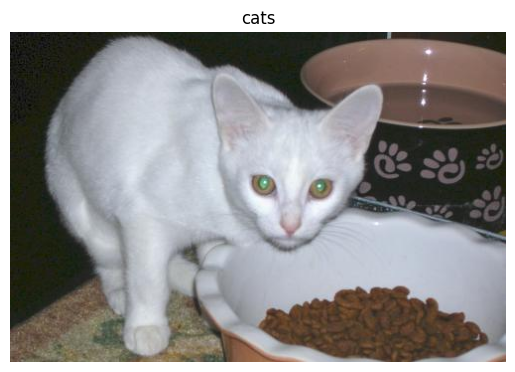

In [ ]:
# Viewing random images
img = plot_random_image(target_dir = 'pet_data/train/',
                        target_class='cats')

In [ ]:
img

array([[[  7,   6,  11],
        [ 18,  17,  22],
        [ 30,  29,  34],
        ...,
        [ 29,  35,  23],
        [ 28,  34,  20],
        [ 27,  33,  19]],

       [[  7,   6,  11],
        [ 14,  13,  18],
        [ 24,  23,  28],
        ...,
        [ 28,  34,  20],
        [ 27,  33,  19],
        [ 27,  33,  19]],

       [[ 19,  18,  23],
        [ 21,  20,  25],
        [ 24,  23,  28],
        ...,
        [ 30,  34,  19],
        [ 29,  33,  18],
        [ 28,  32,  17]],

       ...,

       [[111,  94,  76],
        [117, 100,  82],
        [110,  91,  74],
        ...,
        [133,  95,  72],
        [129,  91,  68],
        [125,  89,  65]],

       [[107,  90,  72],
        [117, 100,  82],
        [116,  97,  80],
        ...,
        [121,  86,  64],
        [123,  88,  68],
        [121,  89,  66]],

       [[ 95,  76,  59],
        [107,  88,  71],
        [109,  90,  73],
        ...,
        [125,  94,  76],
        [131, 102,  86],
        [136, 109,  90]]

### Making dataloaders for the train and test data

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the random seed
tf.random.set_seed(42)

# Making the train images generator
train_datagen = ImageDataGenerator(rescale = 1/255.)

# Making the augmented train images generator
train_datagen_aug = ImageDataGenerator(rescale = 1/255.,
                                       horizontal_flip = True,
                                       vertical_flip = True,
                                       width_shift_range = 0.2,
                                       height_shift_range = 0.2,
                                       zoom_range = 0.3,
                                       rotation_range = 15
                                       )

# Making the test image generator
test_datagen = ImageDataGenerator(rescale = 1/255.)

In [ ]:
train_dir = '/content/pet_data/train/'
test_dir = '/content/pet_data/test/'

# Making the train dataset
train_dataset = train_datagen.flow_from_directory(train_dir,
                                                  target_size = (224, 224),
                                                  batch_size = 16,
                                                  class_mode = 'binary',
                                                  seed = 42)
# Making the train augmented dataset
train_aug_dataset = train_datagen_aug.flow_from_directory(train_dir,
                                                      target_size = (224, 224),
                                                      batch_size = 16,
                                                      class_mode = 'binary',
                                                      seed = 42)
# Making the test dataset
test_dataset = test_datagen.flow_from_directory(test_dir,
                                                  target_size = (224, 224),
                                                  batch_size = 16,
                                                  class_mode = 'binary',
                                                  seed = 42)

Found 21246 images belonging to 2 classes.
Found 21246 images belonging to 2 classes.
Found 3750 images belonging to 2 classes.


### Creating the baseline model

In [ ]:
from tensorflow.keras import layers, Sequential
from tensorflow.keras.optimizers import Adam

# Set the random seed
tf.random.set_seed(42)

# Creating the model
model_0 = Sequential([
    layers.Input(shape = (224, 224, 3)),
    layers.Conv2D(filters = 15, kernel_size=(3,3), padding = 'valid', activation='relu'),
    layers.Conv2D(10, 3, activation = 'relu'),
    layers.Conv2D(10, 3, activation = 'relu'),
    layers.Flatten(),
    layers.Dense(1, activation = 'sigmoid')
], name = 'baseline_model')

# Compile the model
model_0.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = Adam(),
                metrics = ['accuracy'])

# Fit the model
model_0_history = model_0.fit(train_dataset,
                              epochs = 5,
                              steps_per_epoch = len(train_dataset),
                              validation_data = test_dataset,
                              validation_steps = len(test_dataset)
                              )

Epoch 1/5
 863/1328 [==================>...........] - ETA: 19s - loss: 0.6587 - accuracy: 0.6300

/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:858: UserWarning: Truncated File Read
  warnings.warn(str(msg))


1328/1328 [==============================] - 75s 48ms/step - loss: 0.6293 - accuracy: 0.6574 - val_loss: 0.5519 - val_accuracy: 0.7205
Epoch 2/5
1082/1328 [=======================>......] - ETA: 9s - loss: 0.4565 - accuracy: 0.7886

KeyboardInterrupt: ignored

In [ ]:
# Evaluate on the test dataset
model_0.evaluate(test_dataset)

235/235 [==============================] - 9s 36ms/step - loss: 2.0355 - accuracy: 0.6893


[2.0355262756347656, 0.6893333196640015]

In [ ]:
# Plot loss curves of the model
import matplotlib.pyplot as plt
def plot_loss_curves(history, metrics_to_plot=['loss', 'accuracy']):
  plt.figure(figsize = (10, 10))
  for index, metric in enumerate(metrics_to_plot):
    ax = plt.subplot(2, 1, index + 1)
    plt.plot(history.history[metric], label = f'training {metric}')
    plt.plot(history.history[f'val_{metric}'], label = f'val {metric}')
    plt.title(f'{metric} vs Epochs curve')
    plt.xlabel('Epochs')
    plt.ylabel(metric)
    plt.legend();

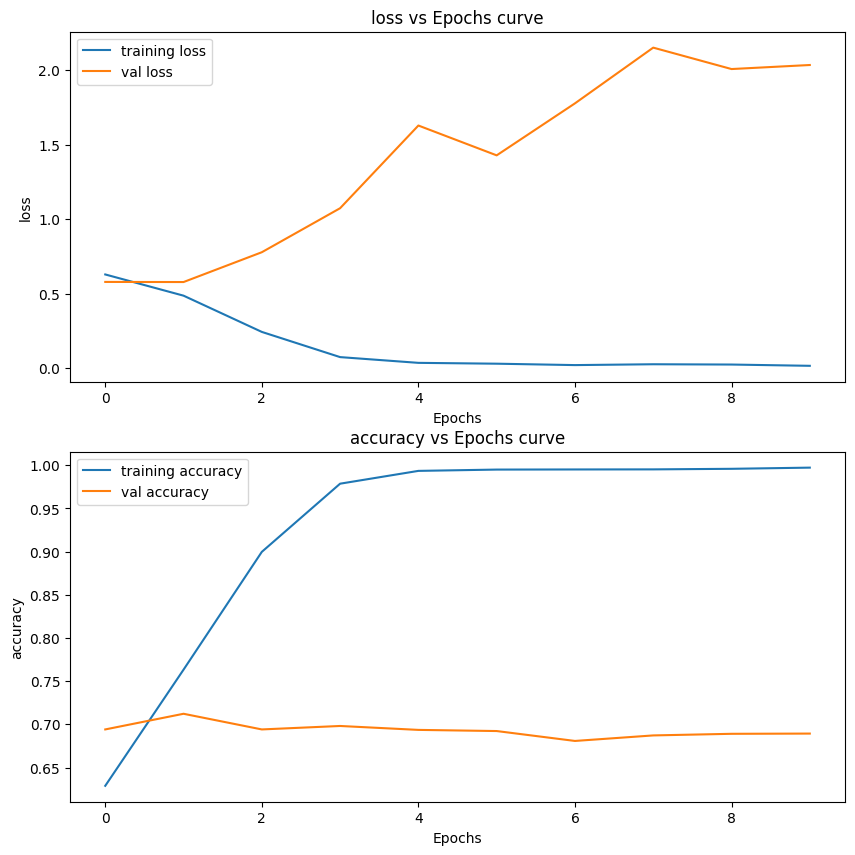

In [ ]:
plot_loss_curves(model_0_history)

In [ ]:
# Make predictions using the model
model_0_preds = model_0.predict(test_dataset)
model_0_preds

235/235 [==============================] - 8s 32ms/step


array([[0.01796885],
       [0.97363687],
       [1.        ],
       ...,
       [0.06628156],
       [0.99997854],
       [0.99997044]], dtype=float32)

### Model 1: Model with more layers

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Create model
model_1 = Sequential([
    layers.Input(shape = (224 ,224, 3)),
    layers.Conv2D(15, 3, padding='valid', activation = 'relu'),
    layers.MaxPool2D(pool_size = 2, padding = 'valid'),
    layers.Conv2D(10, 3, padding = 'valid', activation='relu'),
    layers.MaxPool2D(pool_size = 2),
    layers.Conv2D(10, 3, padding = 'valid', activation='relu'),
    layers.Conv2D(10, 3, activation='relu'),
    layers.MaxPool2D(pool_size = 2),
    layers.Flatten(),
    layers.Dense(1, activation = 'sigmoid')
], name = 'model_1')

# Compile the model
model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = Adam(),
                metrics = ['accuracy'])

# Fit the model
model_1_history = model_1.fit(train_dataset,
                              epochs = 5,
                              steps_per_epoch = len(train_dataset),
                              validation_data = test_dataset,
                              validation_steps = len(test_dataset))

Epoch 1/5
 861/1328 [==================>...........] - ETA: 19s - loss: 0.6347 - accuracy: 0.6315

/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:858: UserWarning: Truncated File Read
  warnings.warn(str(msg))


1328/1328 [==============================] - 66s 48ms/step - loss: 0.6067 - accuracy: 0.6595 - val_loss: 0.5179 - val_accuracy: 0.7565
Epoch 2/5
1328/1328 [==============================] - 63s 47ms/step - loss: 0.5069 - accuracy: 0.7518 - val_loss: 0.5044 - val_accuracy: 0.7541
Epoch 3/5
1328/1328 [==============================] - 76s 57ms/step - loss: 0.4613 - accuracy: 0.7842 - val_loss: 0.4658 - val_accuracy: 0.7861
Epoch 4/5
1328/1328 [==============================] - 64s 48ms/step - loss: 0.4241 - accuracy: 0.8041 - val_loss: 0.4533 - val_accuracy: 0.7904
Epoch 5/5
1328/1328 [==============================] - 63s 48ms/step - loss: 0.3905 - accuracy: 0.8262 - val_loss: 0.4624 - val_accuracy: 0.7723


In [ ]:
# Evaluate on the test model
model_1.evaluate(test_dataset)

235/235 [==============================] - 8s 33ms/step - loss: 0.4624 - accuracy: 0.7723


[0.46241846680641174, 0.772266685962677]

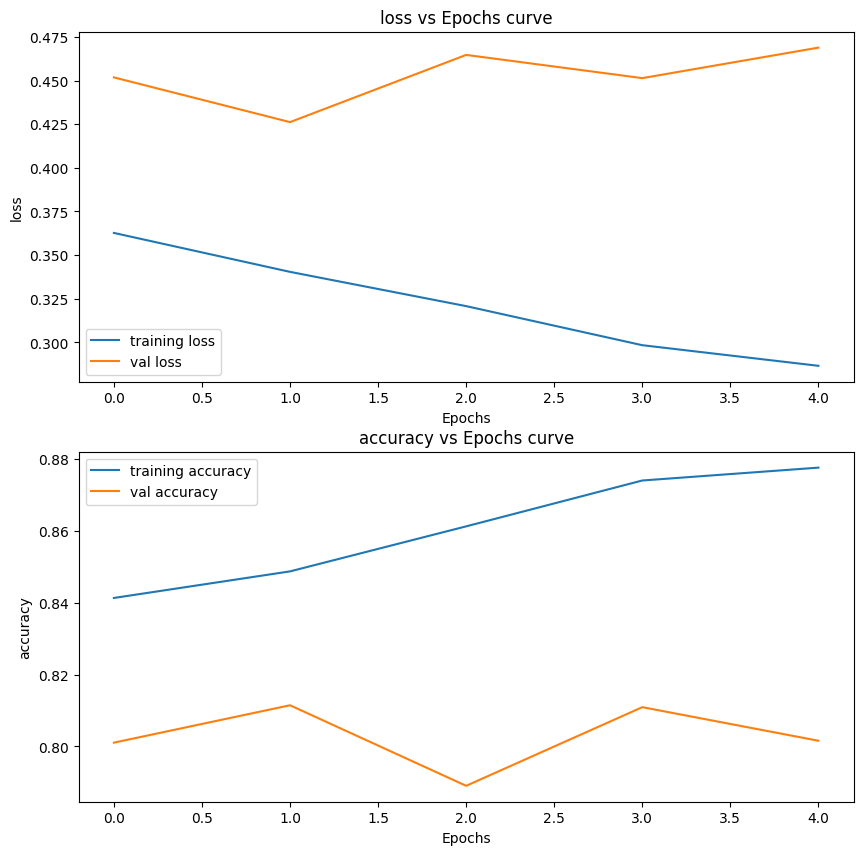

In [ ]:
# Plot the loss curves
plot_loss_curves(model_1_history)

In [ ]:
# Run for 5 more epochs
model_1_history = model_1.fit(train_dataset,
                              epochs = 10,
                              initial_epoch = 5,
                              steps_per_epoch = len(train_dataset),
                              validation_data = test_dataset,
                              validation_steps = len(test_dataset))

Epoch 6/10
  64/1328 [>.............................] - ETA: 46s - loss: 0.3123 - accuracy: 0.8662

/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:858: UserWarning: Truncated File Read
  warnings.warn(str(msg))


1328/1328 [==============================] - 70s 53ms/step - loss: 0.3627 - accuracy: 0.8413 - val_loss: 0.4518 - val_accuracy: 0.8011
Epoch 7/10
1328/1328 [==============================] - 85s 64ms/step - loss: 0.3404 - accuracy: 0.8487 - val_loss: 0.4262 - val_accuracy: 0.8115
Epoch 8/10
1328/1328 [==============================] - 91s 68ms/step - loss: 0.3208 - accuracy: 0.8612 - val_loss: 0.4647 - val_accuracy: 0.7891
Epoch 9/10
1328/1328 [==============================] - 70s 52ms/step - loss: 0.2984 - accuracy: 0.8740 - val_loss: 0.4514 - val_accuracy: 0.8109
Epoch 10/10
1328/1328 [==============================] - 64s 48ms/step - loss: 0.2866 - accuracy: 0.8775 - val_loss: 0.4688 - val_accuracy: 0.8016


In [ ]:
# Evaluate the model
model_1.evaluate(test_dataset)

235/235 [==============================] - 9s 38ms/step - loss: 0.4688 - accuracy: 0.8016


[0.4688352942466736, 0.8015999794006348]

In [ ]:
def compare_history(original_history, new_history,
                    initial_epochs=5,
                    metrics_to_plot = ['loss', 'accuracy']):

  plt.figure(figsize=(7,7))
  for index, metric in enumerate(metrics_to_plot):
    mtr = original_history.history[metric]
    val_mtr = original_history.history[f'val_{metric}']

    total_mtr = mtr + new_history.history[metric]
    total_val_mtr = val_mtr + new_history.history[f'val_{metric}']

    plt.subplot(2,1,index+1)
    plt.plot(total_mtr, label=f"Training {metric}")
    plt.plot(total_val_mtr, label=f"Validation {metric}")
    plt.plot([initial_epochs-1, initial_epochs-1], plt.ylim())
    plt.legend()
    plt.title(f"Training and validation {metric}")

### Model 2: VGG16 architecture

In [ ]:
# set random seed
tf.random.set_seed(42)

# Create the model
model_2 = Sequential([
    layers.Input(shape=(224, 224, 3)),
    # Layer 1
    layers.Conv2D(filters=8, kernel_size=(3,3), padding='same', strides=1, activation='relu'),
    layers.Conv2D(filters=8, kernel_size=(3,3), padding='same', strides=1, activation='relu'),
    layers.MaxPool2D(pool_size=(2,2), strides=2),
    # Layer 2
    layers.Conv2D(filters=16, kernel_size=(3,3), padding='same', strides=1, activation='relu'),
    layers.Conv2D(filters=16, kernel_size=(3,3), padding='same', strides=1, activation='relu'),
    layers.MaxPool2D(pool_size=(2,2), strides=2),
    # Layer 3
    layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', strides=1, activation='relu'),
    layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', strides=1, activation='relu'),
    layers.MaxPool2D(pool_size=(2,2), strides=2),
    # Layer 4
    layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', strides=1, activation='relu'),
    layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', strides=1, activation='relu'),
    layers.MaxPool2D(pool_size=(2,2), strides=2),
    # Layer 5
    layers.Conv2D(filters=128, kernel_size=(3,3), padding='same', strides=1, activation='relu'),
    layers.Conv2D(filters=128, kernel_size=(3,3), padding='same', strides=1, activation='relu'),
    layers.Conv2D(filters=128, kernel_size=(3,3), padding='same', strides=1, activation='relu'),
    layers.MaxPool2D(pool_size=(2,2), strides=2),
    # Layer 6
    layers.Conv2D(filters=128, kernel_size=(3,3), padding='same', strides=1, activation='relu'),
    layers.Conv2D(filters=128, kernel_size=(3,3), padding='same', strides=1, activation='relu'),
    layers.Conv2D(filters=128, kernel_size=(3,3), padding='same', strides=1, activation='relu'),
    layers.MaxPool2D(pool_size=(2,2), strides=2),
    # Layer 7
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(1, activation='sigmoid')
], name='model_2')

# Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer = Adam(),
                metrics = ['accuracy'])

model_2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_71 (Conv2D)          (None, 224, 224, 8)       224       
                                                                 
 conv2d_72 (Conv2D)          (None, 224, 224, 8)       584       
                                                                 
 max_pooling2d_30 (MaxPooli  (None, 112, 112, 8)       0         
 ng2D)                                                           
                                                                 
 conv2d_73 (Conv2D)          (None, 112, 112, 16)      1168      
                                                                 
 conv2d_74 (Conv2D)          (None, 112, 112, 16)      2320      
                                                                 
 max_pooling2d_31 (MaxPooli  (None, 56, 56, 16)        0         
 ng2D)                                                     

In [ ]:
# Fit the model
model_2_history = model_2.fit(train_dataset,
                              epochs = 5,
                              steps_per_epoch = len(train_dataset),
                              validation_data = test_dataset,
                              validation_steps = len(test_dataset))

In [ ]:
# Evaluate on test data
model_2.evaluate(test_dataset)

In [ ]:
# Plot loss curves
plot_loss_curves(model_2_history)

In [ ]:
# Fit for 5 more epochs
model_2_history_new = model_2.fit(train_dataset,
                                  epochs = 10,
                                  initial_epoch=5,
                              steps_per_epoch = len(train_dataset),
                              validation_data = test_dataset,
                              validation_steps = len(test_dataset))

In [ ]:
# Evaluate on test data
model_2.evaluate(test_dataset)

In [ ]:
compare_historys(model_2_history, model_2_history_new)

### Model 3: Tiny VGG Architecture

In [ ]:
# set random seed
tf.random.set_seed(42)

# Create the model
model_3 = Sequential([
    layers.Input(shape=(224, 224, 3)),
    layers.Conv2D(filters=10, kernel_size=(3,3), strides=1, kernel_initializer='he_uniform', activation='relu'),
    layers.Conv2D(filters=10, kernel_size=(3,3), strides=1, kernel_initializer='he_uniform',activation='relu'),
    layers.MaxPool2D(pool_size=(2,2), strides=2),
    layers.Conv2D(filters=10, kernel_size=(3,3), strides=1, kernel_initializer='he_uniform',activation='relu'),
    layers.Conv2D(filters=10, kernel_size=(3,3), strides=1, kernel_initializer='he_uniform',activation='relu'),
    layers.MaxPool2D(pool_size=(2,2), strides=2),
    layers.Flatten(),
    layers.Dense(1, activation='sigmoid')
], name = 'model_3')

# Compile the model
model_3.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = Adam(),
                metrics = ['accuracy'])


Epoch 1/5
 889/1328 [===================>..........] - ETA: 17s - loss: 0.6029 - accuracy: 0.6683

/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:858: UserWarning: Truncated File Read
  warnings.warn(str(msg))


1328/1328 [==============================] - 62s 46ms/step - loss: 0.5785 - accuracy: 0.6927 - val_loss: 0.5207 - val_accuracy: 0.7456
Epoch 2/5
1328/1328 [==============================] - 64s 48ms/step - loss: 0.4654 - accuracy: 0.7818 - val_loss: 0.5201 - val_accuracy: 0.7544
Epoch 3/5
1328/1328 [==============================] - 59s 45ms/step - loss: 0.3950 - accuracy: 0.8203 - val_loss: 0.5307 - val_accuracy: 0.7621
Epoch 4/5
1328/1328 [==============================] - 61s 46ms/step - loss: 0.3222 - accuracy: 0.8620 - val_loss: 0.5609 - val_accuracy: 0.7581
Epoch 5/5
1328/1328 [==============================] - 64s 49ms/step - loss: 0.2668 - accuracy: 0.8877 - val_loss: 0.6014 - val_accuracy: 0.7597


In [ ]:
# Fit the model
model_3_history = model_3.fit(train_dataset,
                              epochs=5,
                              steps_per_epoch=len(train_dataset),
                              validation_data = test_dataset,
                              validation_steps = len(test_dataset))

In [ ]:
# Evaluate the model on test data
model_3.evaluate(test_dataset)

235/235 [==============================] - 9s 38ms/step - loss: 0.6014 - accuracy: 0.7597


[0.6013783812522888, 0.7597333192825317]

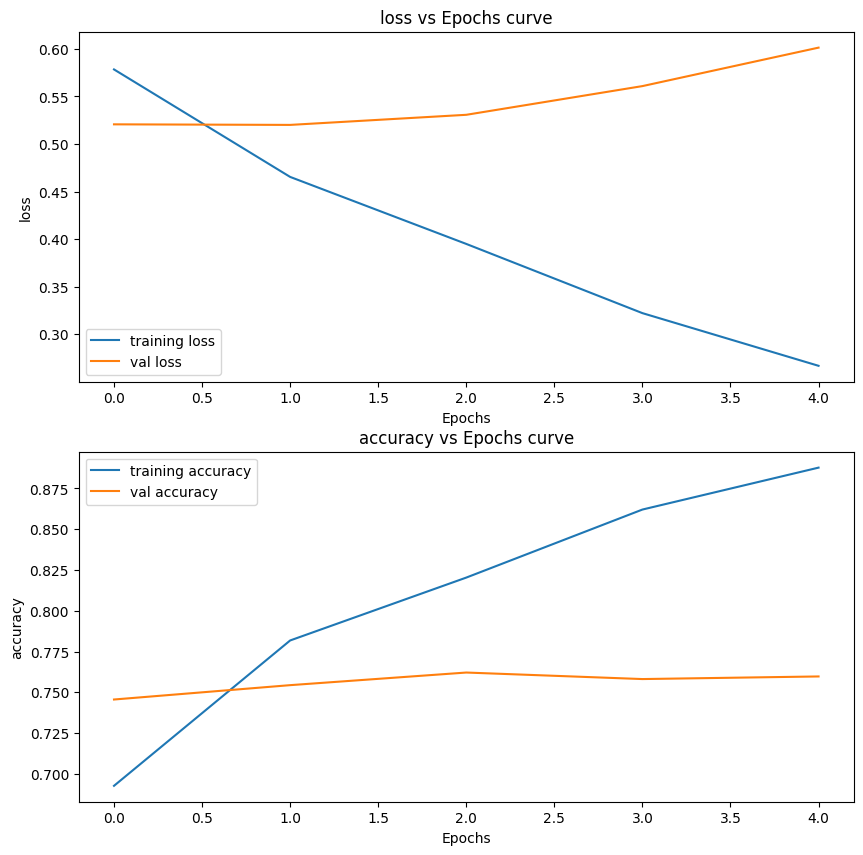

In [ ]:
# Plot the loss curves
plot_loss_curves(model_3_history)

### Model 4: Improving model 1 and run on both normal and augmented data

#### On normal data

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Create model
model_4 = Sequential([
    layers.Input(shape = (224 ,224, 3)),
    layers.Conv2D(15, 3, padding='valid', activation = 'relu'),
    layers.MaxPool2D(pool_size = 2, padding = 'valid'),
    layers.Dropout(0.2, seed=42),
    layers.Conv2D(10, 3, padding = 'valid', activation='relu'),
    layers.MaxPool2D(pool_size = 2),
    layers.Dropout(0.2, seed=42),
    layers.Conv2D(10, 3, padding = 'valid', activation='relu'),
    layers.Conv2D(10, 3, activation='relu'),
    layers.MaxPool2D(pool_size = 2),
    layers.Dropout(0.2, seed=42),
    layers.Flatten(),
    layers.Dense(1, activation = 'sigmoid')
], name = 'model_4')

# Compile the model
model_4.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = Adam(),
                metrics = ['accuracy'])

# Fit the model
model_4_history = model_4.fit(train_dataset,
                              epochs = 5,
                              steps_per_epoch = len(train_dataset),
                              validation_data = test_dataset,
                              validation_steps = len(test_dataset))

Epoch 1/5
 426/1328 [========>.....................] - ETA: 50s - loss: 0.6925 - accuracy: 0.5307

/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:858: UserWarning: Truncated File Read
  warnings.warn(str(msg))


1328/1328 [==============================] - 103s 76ms/step - loss: 0.6868 - accuracy: 0.5517 - val_loss: 0.6476 - val_accuracy: 0.6541
Epoch 2/5
1328/1328 [==============================] - 79s 60ms/step - loss: 0.6073 - accuracy: 0.6665 - val_loss: 0.5570 - val_accuracy: 0.7224
Epoch 3/5
1328/1328 [==============================] - 67s 50ms/step - loss: 0.5298 - accuracy: 0.7353 - val_loss: 0.5924 - val_accuracy: 0.6923
Epoch 4/5
1328/1328 [==============================] - 65s 49ms/step - loss: 0.4791 - accuracy: 0.7684 - val_loss: 0.4709 - val_accuracy: 0.7800
Epoch 5/5
1328/1328 [==============================] - 62s 47ms/step - loss: 0.4487 - accuracy: 0.7902 - val_loss: 0.4667 - val_accuracy: 0.7909


In [ ]:
# Evaluate the model
model_4.evaluate(test_dataset)

235/235 [==============================] - 9s 37ms/step - loss: 0.4667 - accuracy: 0.7909


[0.46668463945388794, 0.7909333109855652]

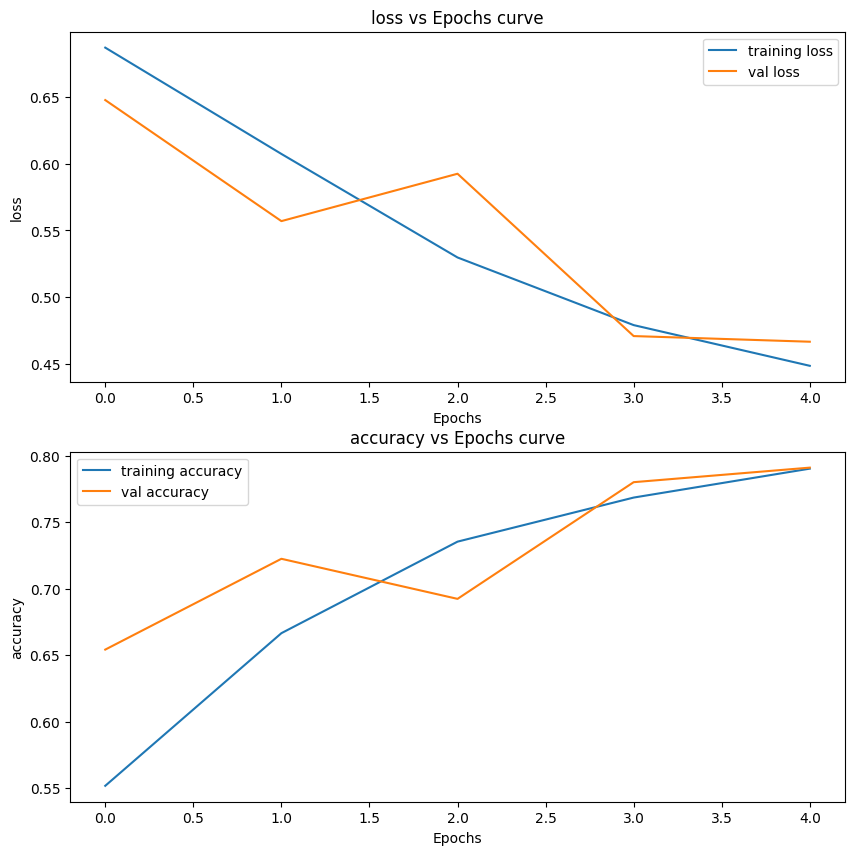

In [ ]:
# Plot the loss curves
plot_loss_curves(model_4_history)

In [ ]:
# Fit for 5 more epochs
model_4_history_new = model_4.fit(train_dataset,
                                      steps_per_epoch=len(train_dataset),
                                      epochs = 10,
                                      initial_epoch = 5,
                                      validation_data = test_dataset,
                                      validation_steps = len(test_dataset))

Epoch 6/10
1328/1328 [==============================] - 69s 52ms/step - loss: 0.4348 - accuracy: 0.7990 - val_loss: 0.4519 - val_accuracy: 0.7936
Epoch 7/10
1328/1328 [==============================] - 64s 48ms/step - loss: 0.4204 - accuracy: 0.8046 - val_loss: 0.4536 - val_accuracy: 0.7837
Epoch 8/10
1328/1328 [==============================] - 67s 51ms/step - loss: 0.4107 - accuracy: 0.8115 - val_loss: 0.4587 - val_accuracy: 0.7936
Epoch 9/10
1328/1328 [==============================] - 67s 51ms/step - loss: 0.4055 - accuracy: 0.8144 - val_loss: 0.4463 - val_accuracy: 0.7973
Epoch 10/10
1328/1328 [==============================] - 65s 49ms/step - loss: 0.3982 - accuracy: 0.8158 - val_loss: 0.4431 - val_accuracy: 0.8024


In [ ]:
# Evaluate the model
model_4.evaluate(test_dataset)

235/235 [==============================] - 9s 38ms/step - loss: 0.4431 - accuracy: 0.8024


[0.44306498765945435, 0.8023999929428101]

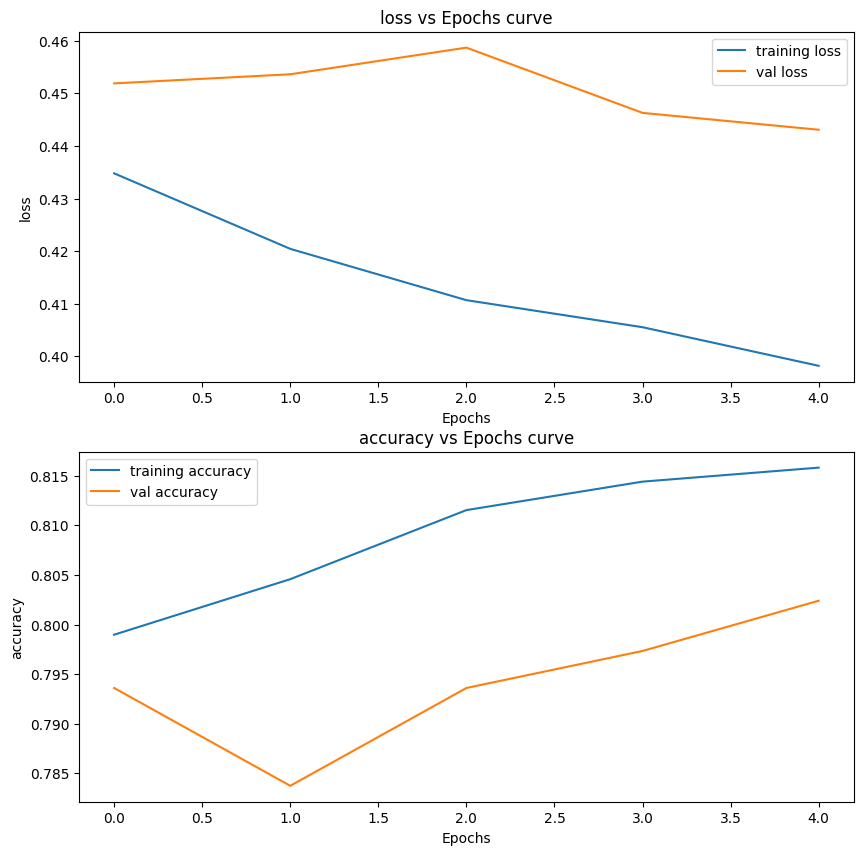

In [ ]:
# Plot the loss curves
plot_loss_curves(model_4_history_new)

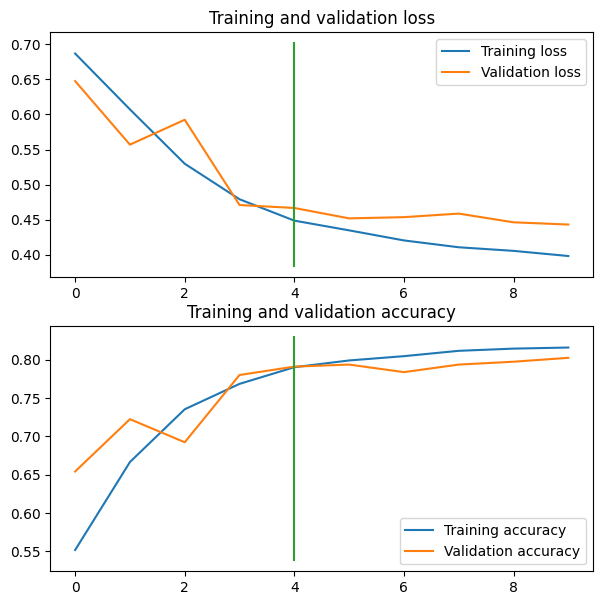

In [ ]:
# Compare historys
compare_history(model_4_history, model_4_history_new)

#### Fit on augmented data

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Create model
model_4_b = tf.keras.models.clone_model(model_4)

# Compile the model
model_4_b.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = Adam(),
                metrics = ['accuracy'])

# Fit the model
model_4_b_history = model_4_b.fit(train_aug_dataset,
                                  epochs = 5,
                                  steps_per_epoch = len(train_aug_dataset),
                                  validation_data = test_dataset,
                                  validation_steps = len(test_dataset))

Epoch 1/5
 582/1328 [============>.................] - ETA: 2:37 - loss: 0.6937 - accuracy: 0.5183

/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:858: UserWarning: Truncated File Read
  warnings.warn(str(msg))


1328/1328 [==============================] - 290s 217ms/step - loss: 0.6873 - accuracy: 0.5429 - val_loss: 0.6714 - val_accuracy: 0.6099
Epoch 2/5
1328/1328 [==============================] - 288s 217ms/step - loss: 0.6690 - accuracy: 0.5960 - val_loss: 0.6528 - val_accuracy: 0.6331
Epoch 3/5
1328/1328 [==============================] - 295s 222ms/step - loss: 0.6572 - accuracy: 0.6202 - val_loss: 0.6344 - val_accuracy: 0.6619
Epoch 4/5
1328/1328 [==============================] - 394s 297ms/step - loss: 0.6328 - accuracy: 0.6485 - val_loss: 0.5912 - val_accuracy: 0.6875
Epoch 5/5
1328/1328 [==============================] - 299s 225ms/step - loss: 0.6116 - accuracy: 0.6652 - val_loss: 0.5820 - val_accuracy: 0.7003


In [ ]:
model_4_b.evaluate(test_dataset)

235/235 [==============================] - 8s 34ms/step - loss: 0.5820 - accuracy: 0.7003


[0.5820327997207642, 0.7002666592597961]

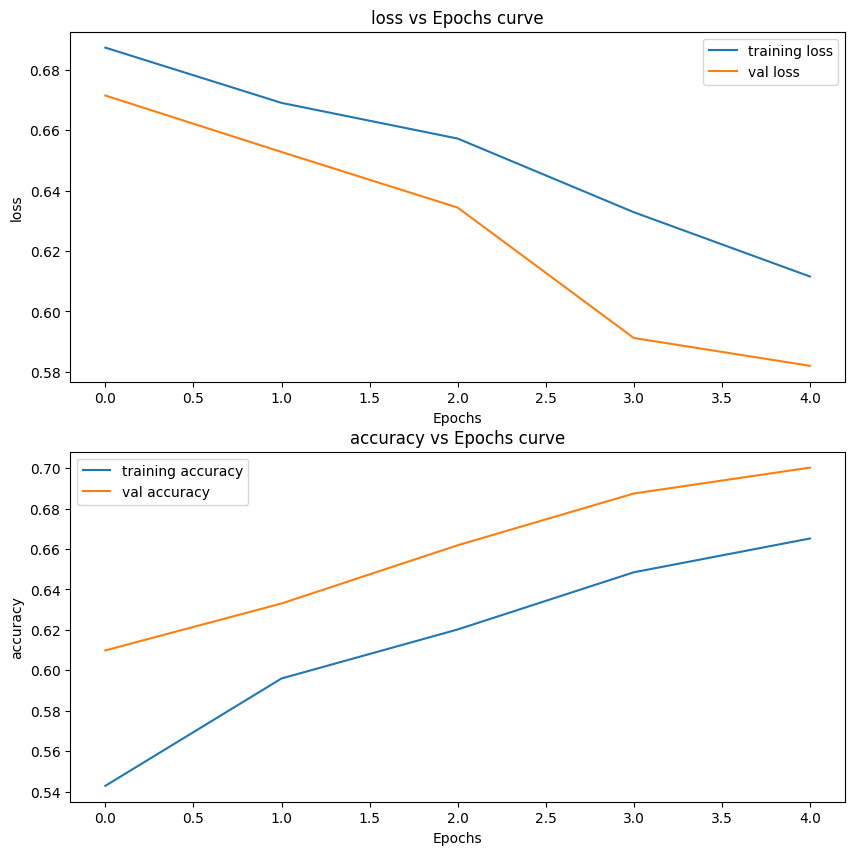

In [ ]:
# Plot loss curves
plot_loss_curves(model_4_b_history)

In [ ]:
# Fit for 10 more epochs
model_4_b_history_new = model_4_b.fit(train_aug_dataset,
                                      steps_per_epoch=len(train_aug_dataset),
                                      epochs = 15,
                                      initial_epoch = 5,
                                      validation_data = test_dataset,
                                      validation_steps = len(test_dataset))

Epoch 6/15
1325/1328 [============================>.] - ETA: 0s - loss: 0.5926 - accuracy: 0.6839

/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:858: UserWarning: Truncated File Read
  warnings.warn(str(msg))


1328/1328 [==============================] - 322s 242ms/step - loss: 0.5927 - accuracy: 0.6837 - val_loss: 0.5710 - val_accuracy: 0.7152
Epoch 7/15
1035/1328 [======================>.......] - ETA: 1:04 - loss: 0.5875 - accuracy: 0.6875

In [ ]:
# Evaluate the model
model_4_b.evaluate(test_dataset)

In [ ]:
# Plot the loss curve
plot_loss_curves(model_4_b_history_new)

In [ ]:
# Compare historys
compare_historys(model_4_b_history, model_4_b_history_new)

### Making prefetch dataset faster performance

In [ ]:
(next(iter(train_dataset))[0]).shape

(16, 224, 224, 3)

In [174]:
# Getting catsVsDogs dataset using tfds
import tensorflow_datasets as tfds
import tensorflow as tf

(train, test), metadata = tfds.load('cats_vs_dogs',
                                    split=['train[:85%]', 'train[85%:]'],
                                    with_info=True,
                                    shuffle_files = True,
                                    )

#### Getting information out of the tensorflow dataset

In [ ]:
metadata.features

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=uint8),
    'image/filename': Text(shape=(), dtype=string),
    'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
})

In [ ]:
# Get number of classes and class names
NUM_CLASSES = metadata.features['label'].num_classes
class_names = metadata.features['label'].names
NUM_CLASSES, class_names

(2, ['cat', 'dog'])

In [ ]:
# Checking the shape of the data
metadata.features.shape, metadata.features.dtype

({'image': (None, None, 3), 'image/filename': (), 'label': ()},
 {'image': tf.uint8, 'image/filename': tf.string, 'label': tf.int64})

In [ ]:
print("Number of samples in train data:", metadata.splits['train[:85%]'].num_examples)
print("Number of samples in test data:", metadata.splits['train[85%:]'].num_examples)

Number of samples in train data: 19773
Number of samples in test data: 3489


#### Checking out one sample of the data

In [ ]:
train_one_sample = next(iter(train))
image = train_one_sample['image'].numpy()
label = train_one_sample['label'].numpy()

In [ ]:
train_one_sample

{'image': <tf.Tensor: shape=(316, 300, 3), dtype=uint8, numpy=
 array([[[ 23,  20,  11],
         [ 25,  22,   5],
         [ 99,  94,  64],
         ...,
         [ 57,  40,  22],
         [ 67,  48,  31],
         [ 70,  51,  34]],
 
        [[ 31,  29,  17],
         [ 21,  18,   1],
         [ 82,  77,  48],
         ...,
         [ 65,  50,  31],
         [ 74,  57,  39],
         [ 70,  53,  35]],
 
        [[ 67,  64,  47],
         [ 18,  13,   0],
         [ 53,  47,  21],
         ...,
         [ 55,  42,  25],
         [ 66,  50,  34],
         [ 61,  45,  29]],
 
        ...,
 
        [[ 85,  76,  45],
         [ 85,  78,  49],
         [ 85,  80,  51],
         ...,
         [123, 114,  99],
         [121, 112,  97],
         [122, 113,  98]],
 
        [[ 82,  73,  44],
         [ 87,  80,  51],
         [ 88,  83,  53],
         ...,
         [124, 115,  98],
         [123, 114,  97],
         [121, 112,  95]],
 
        [[ 80,  71,  42],
         [ 86,  79,  50],
     

In [ ]:
image, label

(array([[[ 23,  20,  11],
         [ 25,  22,   5],
         [ 99,  94,  64],
         ...,
         [ 57,  40,  22],
         [ 67,  48,  31],
         [ 70,  51,  34]],
 
        [[ 31,  29,  17],
         [ 21,  18,   1],
         [ 82,  77,  48],
         ...,
         [ 65,  50,  31],
         [ 74,  57,  39],
         [ 70,  53,  35]],
 
        [[ 67,  64,  47],
         [ 18,  13,   0],
         [ 53,  47,  21],
         ...,
         [ 55,  42,  25],
         [ 66,  50,  34],
         [ 61,  45,  29]],
 
        ...,
 
        [[ 85,  76,  45],
         [ 85,  78,  49],
         [ 85,  80,  51],
         ...,
         [123, 114,  99],
         [121, 112,  97],
         [122, 113,  98]],
 
        [[ 82,  73,  44],
         [ 87,  80,  51],
         [ 88,  83,  53],
         ...,
         [124, 115,  98],
         [123, 114,  97],
         [121, 112,  95]],
 
        [[ 80,  71,  42],
         [ 86,  79,  50],
         [ 85,  79,  47],
         ...,
         [128, 119, 102],
  

In [ ]:
# Output info about our training sample
print(f"""
  Image shape: {image.shape}
  Image dtype: {image.dtype}
  Target class from CatsVsDogs (tensor form): {label}
        """)


  Image shape: (316, 300, 3)
  Image dtype: uint8
  Target class from CatsVsDogs (tensor form): 0
        


In [ ]:
# Checking the min and max values of the image
image.min(), image.max()

(0, 255)

#### Now, preprocessing the image data

In [175]:
# Make a function for preprocessing images
def preprocess_img(sample, img_shape=224):
  image = sample['image']
  image = tf.image.resize(image, [img_shape, img_shape]) # reshape to img_shape
  return (tf.cast(image, tf.float32), sample['label'])

In [ ]:
preprocess_img(train_one_sample)

In [ ]:
train_one_sample

{'image': <tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[ 24.564095  ,  21.734613  ,  10.8659115 ],
         [ 60.480625  ,  56.46277   ,  32.95121   ],
         [132.05031   , 125.179695  ,  85.55485   ],
         ...,
         [ 47.13907   ,  30.375599  ,  14.040837  ],
         [ 63.452896  ,  45.881435  ,  28.167166  ],
         [ 69.734924  ,  51.14564   ,  33.940285  ]],
 
        [[ 47.406174  ,  44.515945  ,  29.527985  ],
         [ 42.04448   ,  37.108017  ,  16.151625  ],
         [124.3723    , 116.73414   ,  81.10021   ],
         ...,
         [ 57.279194  ,  44.230797  ,  26.917336  ],
         [ 63.864178  ,  48.811596  ,  31.534828  ],
         [ 65.238464  ,  48.85453   ,  32.086674  ]],
 
        [[ 95.361046  ,  92.83442   ,  70.133606  ],
         [ 27.136637  ,  21.627232  ,   0.63998675],
         [106.40841   ,  97.83698   ,  70.026955  ],
         ...,
         [ 57.93084   ,  48.68082   ,  31.510374  ],
         [ 48.760944  ,  37.814514  ,  

#### Batch and prepare the dataset

In [176]:
# Make the train data
train_data = train.map(map_func=preprocess_img,
                       num_parallel_calls=tf.data.AUTOTUNE)
train_data = train_data.shuffle(buffer_size=1000).batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE)


In [177]:
# Make the train data
test_data = test.map(map_func=preprocess_img,
                       num_parallel_calls=tf.data.AUTOTUNE)
test_data = test_data.batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE)


In [ ]:
train_data, test_data

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>)

In [ ]:
(next(train_dataset))[0]

array([[[[0.7058824 , 0.36862746, 0.03529412],
         [0.7176471 , 0.37254903, 0.08235294],
         [0.57254905, 0.23137257, 0.02352941],
         ...,
         [0.77647066, 0.7294118 , 0.63529414],
         [0.7686275 , 0.72156864, 0.627451  ],
         [0.7607844 , 0.7137255 , 0.61960787]],

        [[0.7294118 , 0.3921569 , 0.05882353],
         [0.7254902 , 0.3803922 , 0.09019608],
         [0.5686275 , 0.227451  , 0.01960784],
         ...,
         [0.77647066, 0.72156864, 0.61960787],
         [0.7725491 , 0.7176471 , 0.6156863 ],
         [0.76470596, 0.70980394, 0.60784316]],

        [[0.74509805, 0.40784317, 0.07450981],
         [0.73333335, 0.38823533, 0.09803922],
         [0.5647059 , 0.22352943, 0.01568628],
         ...,
         [0.7725491 , 0.7137255 , 0.62352943],
         [0.7725491 , 0.70980394, 0.61960787],
         [0.7686275 , 0.7058824 , 0.6156863 ]],

        ...,

        [[0.7568628 , 0.5137255 , 0.42352945],
         [0.654902  , 0.41960788, 0.31764707]

#### Setup mixed precisioning

In [178]:
# Turn on mixed precision training
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy(policy="mixed_float16") # set global policy to mixed precision

### Model 5: Same model as model_4, but run on prefetched dataset

In [ ]:
from tensorflow.keras import Sequential, layers
from tensorflow.keras.optimizers import Adam

# set random seed
tf.random.set_seed(42)

# Create the model
model_5 = Sequential([
    layers.Input(shape=(224, 224, 3)),
    layers.Conv2D(filters=10, kernel_size=(3,3), strides=1, kernel_initializer='he_uniform', activation='relu'),
    layers.Conv2D(filters=10, kernel_size=(3,3), strides=1, kernel_initializer='he_uniform',activation='relu'),
    layers.MaxPool2D(pool_size=(2,2), strides=2),
    layers.Conv2D(filters=10, kernel_size=(3,3), strides=1, kernel_initializer='he_uniform',activation='relu'),
    layers.Conv2D(filters=10, kernel_size=(3,3), strides=1, kernel_initializer='he_uniform',activation='relu'),
    layers.MaxPool2D(pool_size=(2,2), strides=2),
    layers.Flatten(),
    layers.Dense(1, activation='sigmoid')
], name = 'model_5')

# Compile the model
model_5.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = Adam(),
                metrics = ['accuracy'])


# Fit the model
model_5_history = model_5.fit(train_data,
                              epochs = 5,
                              steps_per_epoch = len(train_data),
                              validation_data = test_data,
                              validation_steps = len(test_data))

Epoch 1/5
1236/1236 [==============================] - 42s 31ms/step - loss: 4.9624 - accuracy: 0.5285 - val_loss: 0.6935 - val_accuracy: 0.5099
Epoch 2/5
1236/1236 [==============================] - 37s 29ms/step - loss: 0.6847 - accuracy: 0.5536 - val_loss: 0.6981 - val_accuracy: 0.5314
Epoch 3/5
1236/1236 [==============================] - 38s 30ms/step - loss: 0.6684 - accuracy: 0.5841 - val_loss: 0.6902 - val_accuracy: 0.5560
Epoch 4/5
1236/1236 [==============================] - 37s 29ms/step - loss: 0.6439 - accuracy: 0.6179 - val_loss: 0.7100 - val_accuracy: 0.5612
Epoch 5/5
1236/1236 [==============================] - 37s 29ms/step - loss: 0.6162 - accuracy: 0.6491 - val_loss: 0.7195 - val_accuracy: 0.5921


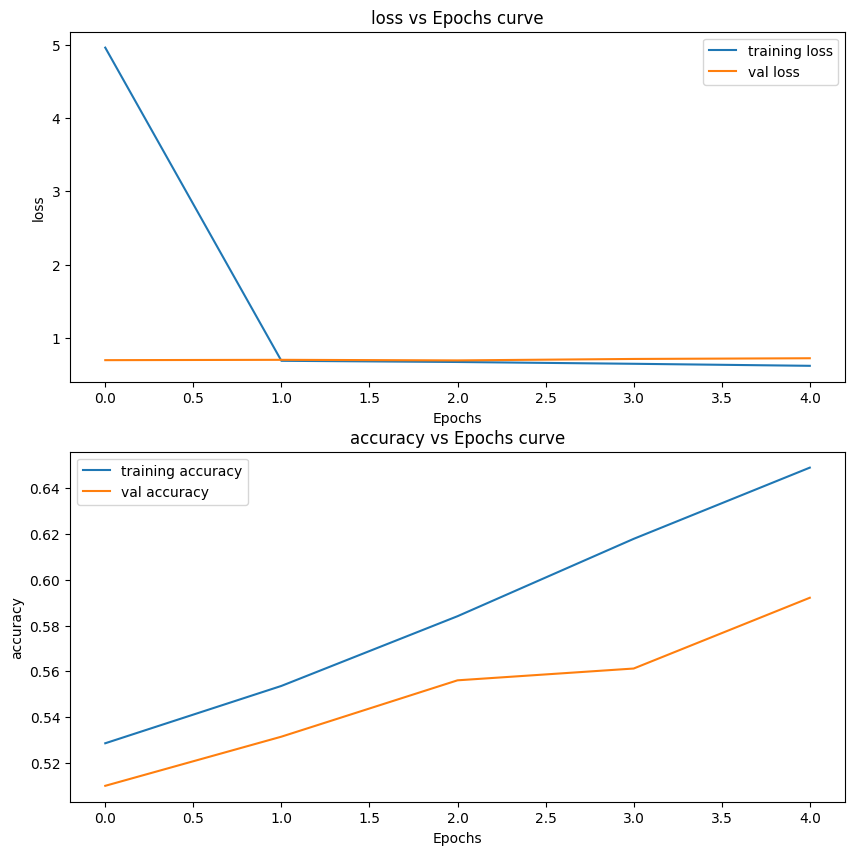

In [ ]:
plot_loss_curves(model_5_history)

In [ ]:
# Fitting for 15 more epochs
# Fit the model
model_5_history_new = model_5.fit(train_data,
                              epochs = 20,
                                  initial_epoch=5,
                              steps_per_epoch = len(train_data),
                              validation_data = test_data,
                              validation_steps = len(test_data))

Epoch 6/20
1236/1236 [==============================] - 52s 39ms/step - loss: 0.5801 - accuracy: 0.6819 - val_loss: 0.7523 - val_accuracy: 0.6197
Epoch 7/20
1236/1236 [==============================] - 47s 36ms/step - loss: 0.5477 - accuracy: 0.7085 - val_loss: 0.8064 - val_accuracy: 0.6197
Epoch 8/20
1236/1236 [==============================] - 57s 44ms/step - loss: 0.5130 - accuracy: 0.7327 - val_loss: 0.8934 - val_accuracy: 0.6162
Epoch 9/20
1236/1236 [==============================] - 47s 35ms/step - loss: 0.4775 - accuracy: 0.7564 - val_loss: 0.8859 - val_accuracy: 0.6088
Epoch 10/20
1236/1236 [==============================] - 36s 28ms/step - loss: 0.4449 - accuracy: 0.7764 - val_loss: 0.9351 - val_accuracy: 0.5901
Epoch 11/20
1236/1236 [==============================] - 43s 34ms/step - loss: 0.4070 - accuracy: 0.7975 - val_loss: 1.1286 - val_accuracy: 0.6019
Epoch 12/20
1236/1236 [==============================] - 38s 29ms/step - loss: 0.3865 - accuracy: 0.8127 - val_loss: 1.314

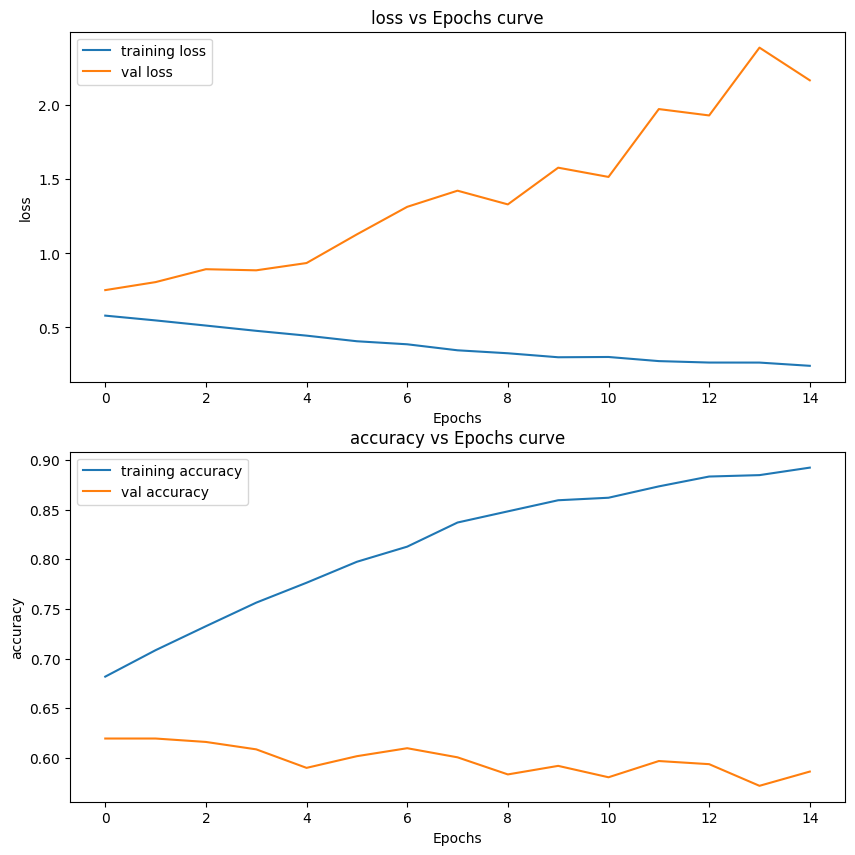

In [ ]:
plot_loss_curves(model_5_history_new)

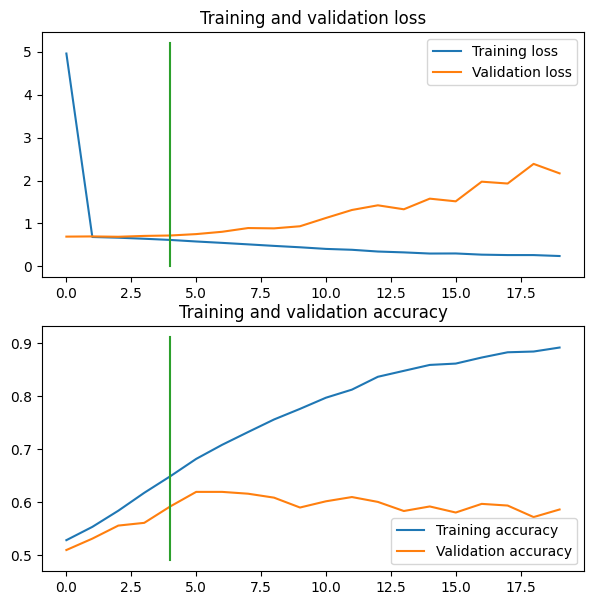

In [ ]:
# Compare the history
compare_history(model_5_history, model_5_history_new)

### Model 5.B: Using dropout layers in model_5 (2 GRP VGG)

In [149]:
from tensorflow.keras import Sequential, layers
from tensorflow.keras.optimizers import Adam

# set random seed
tf.random.set_seed(42)

# Create the model
model_5_b = Sequential([
    layers.Input(shape=(224, 224, 3)),
    layers.Conv2D(filters=10, kernel_size=(3,3), strides=1, kernel_initializer='he_uniform', activation='relu'),
    layers.Conv2D(filters=10, kernel_size=(3,3), strides=1, kernel_initializer='he_uniform',activation='relu'),
    layers.MaxPool2D(pool_size=(2,2), strides=2),
    layers.Dropout(0.2),
    layers.Conv2D(filters=10, kernel_size=(3,3), strides=1, kernel_initializer='he_uniform',activation='relu'),
    layers.Conv2D(filters=10, kernel_size=(3,3), strides=1, kernel_initializer='he_uniform',activation='relu'),
    layers.MaxPool2D(pool_size=(2,2), strides=2),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(1, activation='sigmoid')
], name = 'model_5_b')

# Compile the model
model_5_b.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = Adam(),
                metrics = ['accuracy'])


# Fit the model
model_5_b_history = model_5_b.fit(train_data,
                              epochs = 5,
                              steps_per_epoch = len(train_data),
                              validation_data = test_data,
                              validation_steps = len(test_data))

Epoch 1/5
1236/1236 [==============================] - 65s 47ms/step - loss: 4.7139 - accuracy: 0.5544 - val_loss: 0.6640 - val_accuracy: 0.5939
Epoch 2/5
1236/1236 [==============================] - 58s 46ms/step - loss: 0.6523 - accuracy: 0.6001 - val_loss: 0.6466 - val_accuracy: 0.6122
Epoch 3/5
1236/1236 [==============================] - 64s 49ms/step - loss: 0.6164 - accuracy: 0.6508 - val_loss: 0.6119 - val_accuracy: 0.6532
Epoch 4/5
1236/1236 [==============================] - 62s 48ms/step - loss: 0.5894 - accuracy: 0.6822 - val_loss: 0.5782 - val_accuracy: 0.7002
Epoch 5/5
1236/1236 [==============================] - 75s 59ms/step - loss: 0.5636 - accuracy: 0.7051 - val_loss: 0.5913 - val_accuracy: 0.6787


In [150]:
model_5_b.evaluate(test_data)

219/219 [==============================] - 4s 19ms/step - loss: 0.5913 - accuracy: 0.6787


[0.5912573933601379, 0.6787045001983643]

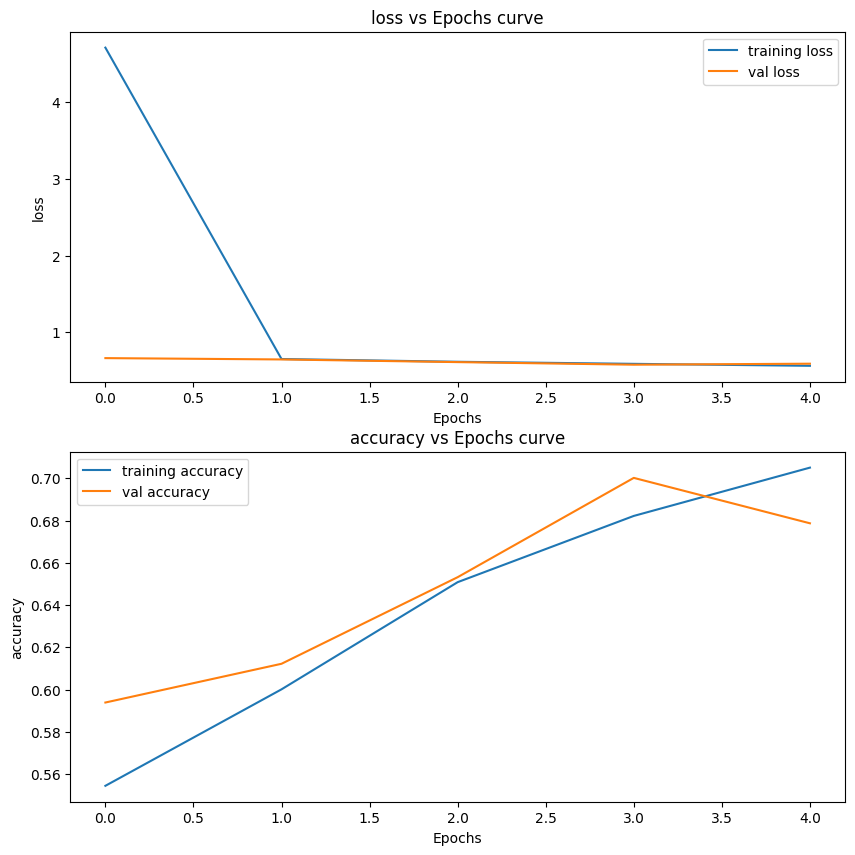

In [151]:
# Plot loss curves
plot_loss_curves(model_5_b_history)

### Model 5.C - Same as model_4 (3 GRP VGG) with dropouts. Also apply model checkpoint callback

In [153]:
# Set the random seed
tf.random.set_seed(42)

# Making model checkpoint callback
def create_model_checkpoint(save_dir):
  return tf.keras.callbacks.ModelCheckpoint(filepath = save_dir,
                                            monitor = 'val_loss',
                                            save_best_only=True,
                                            mode='min',
                                            verbose = 0)

# Create model
model_5_c = Sequential([
    layers.Input(shape = (224 ,224, 3)),
    layers.Conv2D(10, 3, padding='valid', activation = 'relu'),
    layers.MaxPool2D(pool_size = 2, padding = 'valid'),
    layers.Dropout(0.2, seed=42),
    layers.Conv2D(10, 3, padding = 'valid', activation='relu'),
    layers.MaxPool2D(pool_size = 2),
    layers.Dropout(0.2, seed=42),
    layers.Conv2D(10, 3, padding = 'valid', activation='relu'),
    layers.Conv2D(10, 3, activation='relu'),
    layers.MaxPool2D(pool_size = 2),
    layers.Dropout(0.2, seed=42),
    layers.Flatten(),
    layers.Dense(1, activation = 'sigmoid')
], name = 'model_5_c')

# Compile the model
model_5_c.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = Adam(),
                metrics = ['accuracy'])

# Fit the model
model_5_c_history = model_5_c.fit(train_data,
                              epochs = 5,
                              steps_per_epoch = len(train_data),
                              validation_data = test_data,
                              validation_steps = len(test_data),
                              callbacks = [create_model_checkpoint(save_dir = 'model_exp/model_5_c')])

Epoch 1/5
1236/1236 [==============================] - 82s 64ms/step - loss: 0.9231 - accuracy: 0.5063 - val_loss: 0.6932 - val_accuracy: 0.5021
Epoch 2/5
1236/1236 [==============================] - 60s 47ms/step - loss: 0.6933 - accuracy: 0.4968 - val_loss: 0.6931 - val_accuracy: 0.4999
Epoch 3/5
1236/1236 [==============================] - 41s 32ms/step - loss: 0.6918 - accuracy: 0.5196 - val_loss: 0.6927 - val_accuracy: 0.5259
Epoch 4/5
1236/1236 [==============================] - 38s 30ms/step - loss: 0.6893 - accuracy: 0.5327 - val_loss: 0.6919 - val_accuracy: 0.5236
Epoch 5/5
1236/1236 [==============================] - 46s 36ms/step - loss: 0.6860 - accuracy: 0.5395 - val_loss: 0.6924 - val_accuracy: 0.5219


In [155]:
# Evaluate the model
model_5_c.evaluate(test_data)

219/219 [==============================] - 5s 21ms/step - loss: 0.6924 - accuracy: 0.5219


[0.692423403263092, 0.5219260454177856]

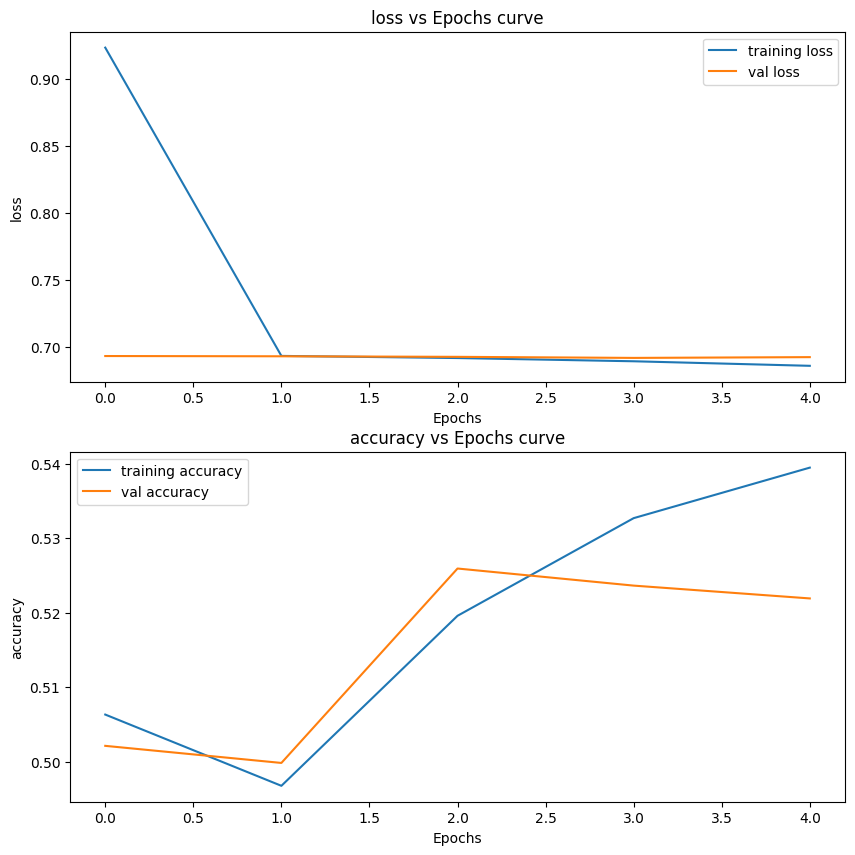

In [156]:
# Plot the loss curves
plot_loss_curves(model_5_c_history)

In [157]:
# Get the best weights model
model_5_c_loaded = tf.keras.models.load_model('model_exp/model_5_c')
model_5_c_loaded.evaluate(test_data)

219/219 [==============================] - 6s 29ms/step - loss: 0.6919 - accuracy: 0.5236


[0.6918748021125793, 0.5236457586288452]

#### Fit the model for 15 more epochs

In [159]:
model_5_c_new_history = model_5_c_loaded.fit(train_data,
                              epochs = 20,
                                             initial_epoch=5,
                              steps_per_epoch = len(train_data),
                              validation_data = test_data,
                              validation_steps = len(test_data),
                              callbacks = [create_model_checkpoint(save_dir = 'model_exp/model_5_c_new')])

Epoch 6/20
1236/1236 [==============================] - 65s 49ms/step - loss: 0.6889 - accuracy: 0.5376 - val_loss: 0.6926 - val_accuracy: 0.5136
Epoch 7/20
1236/1236 [==============================] - 41s 32ms/step - loss: 0.6863 - accuracy: 0.5383 - val_loss: 0.6924 - val_accuracy: 0.5208
Epoch 8/20
1236/1236 [==============================] - 43s 34ms/step - loss: 0.6811 - accuracy: 0.5490 - val_loss: 0.6931 - val_accuracy: 0.5216
Epoch 9/20
1236/1236 [==============================] - 46s 36ms/step - loss: 0.6783 - accuracy: 0.5511 - val_loss: 0.6927 - val_accuracy: 0.5259
Epoch 10/20
1236/1236 [==============================] - 42s 33ms/step - loss: 0.6732 - accuracy: 0.5627 - val_loss: 0.6890 - val_accuracy: 0.5483
Epoch 11/20
1236/1236 [==============================] - 46s 37ms/step - loss: 0.6682 - accuracy: 0.5696 - val_loss: 0.6921 - val_accuracy: 0.5325
Epoch 12/20
1236/1236 [==============================] - 42s 33ms/step - loss: 0.6650 - accuracy: 0.5749 - val_loss: 0.688

In [160]:
model_5_c_loaded.evaluate(test_data)

219/219 [==============================] - 6s 27ms/step - loss: 0.6766 - accuracy: 0.6002


[0.6765670776367188, 0.6001719832420349]

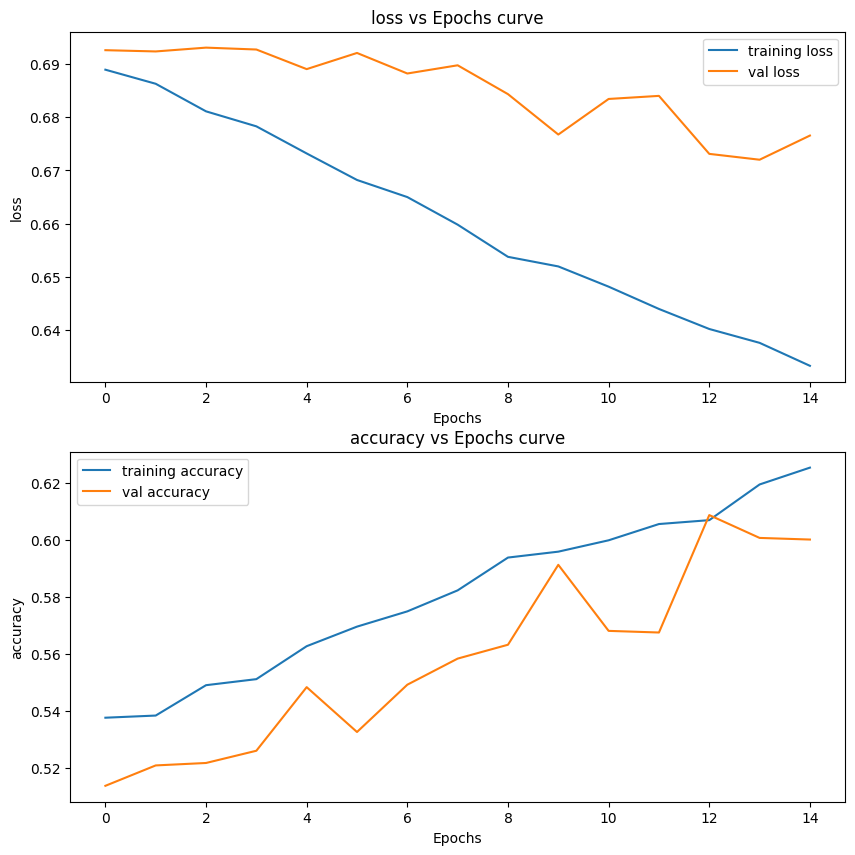

In [161]:
plot_loss_curves(model_5_c_new_history)

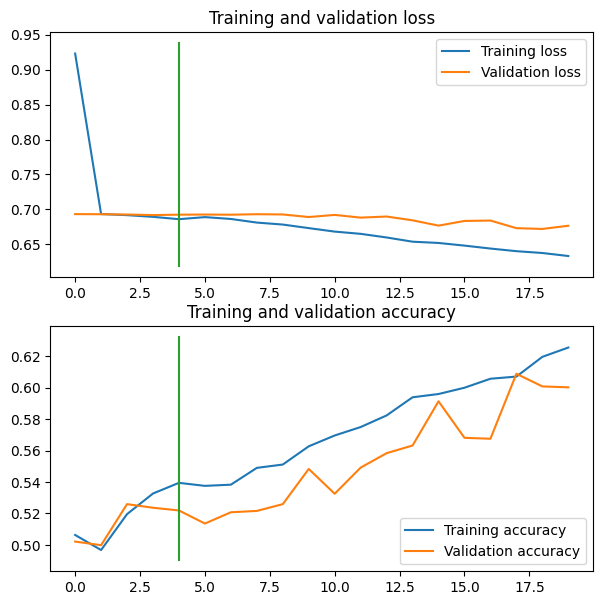

In [162]:
compare_history(model_5_c_history, model_5_c_new_history)

In [185]:
# Making a function to compare histories at any time
def compare_history_overall(history_lst = [],
                    initial_epoch_lst=[5],
                    metrics_to_plot = ['loss', 'accuracy']):

  plt.figure(figsize=(12,12))
  for index, metric in enumerate(metrics_to_plot):
    total_mtr = history_lst[0].history[metric]
    total_val_mtr = history_lst[0].history[f'val_{metric}']

    for history in history_lst[1:]:
      total_mtr = total_mtr + history.history[metric]
      total_val_mtr = total_val_mtr + history.history[f'val_{metric}']

    plt.subplot(2,1,index+1)
    plt.plot(total_mtr, label=f"Training {metric}")
    plt.plot(total_val_mtr, label=f"Validation {metric}")

    for epoch in initial_epoch_lst:
      plt.plot([epoch-1, epoch-1], plt.ylim())

    plt.title(f"Training and validation {metric}")
    plt.xlabel('Epochs')
    plt.ylabel(metric)
    plt.tight_layout()
    plt.legend()

#### Fit for 20 more epochs

In [164]:
model_5_c_loaded_2 = tf.keras.models.load_model('model_exp/model_5_c_new')
model_5_c_loaded_2.evaluate(test_data)

219/219 [==============================] - 6s 23ms/step - loss: 0.6720 - accuracy: 0.6007


[0.6720283627510071, 0.6007452011108398]

In [165]:
model_5_c_new_2_history = model_5_c_loaded_2.fit(train_data,
                              epochs = 40,
                                             initial_epoch=20,
                              steps_per_epoch = len(train_data),
                              validation_data = test_data,
                              validation_steps = len(test_data),
                              callbacks = [create_model_checkpoint(save_dir = 'model_exp/model_5_c_new_2')])

Epoch 21/40
1236/1236 [==============================] - 51s 39ms/step - loss: 0.6319 - accuracy: 0.6318 - val_loss: 0.6768 - val_accuracy: 0.6102
Epoch 22/40
1236/1236 [==============================] - 47s 37ms/step - loss: 0.6267 - accuracy: 0.6399 - val_loss: 0.6740 - val_accuracy: 0.6174
Epoch 23/40
1236/1236 [==============================] - 51s 41ms/step - loss: 0.6248 - accuracy: 0.6393 - val_loss: 0.6645 - val_accuracy: 0.6242
Epoch 24/40
1236/1236 [==============================] - 54s 42ms/step - loss: 0.6175 - accuracy: 0.6472 - val_loss: 0.6659 - val_accuracy: 0.6165
Epoch 25/40
1236/1236 [==============================] - 52s 41ms/step - loss: 0.6123 - accuracy: 0.6558 - val_loss: 0.6681 - val_accuracy: 0.6268
Epoch 26/40
1236/1236 [==============================] - 53s 42ms/step - loss: 0.6128 - accuracy: 0.6581 - val_loss: 0.6893 - val_accuracy: 0.6228
Epoch 27/40
1236/1236 [==============================] - 48s 38ms/step - loss: 0.6065 - accuracy: 0.6634 - val_loss: 0

In [166]:
model_5_c_loaded_2.evaluate(test_data)

219/219 [==============================] - 6s 28ms/step - loss: 0.8754 - accuracy: 0.5500


[0.8754234910011292, 0.550014317035675]

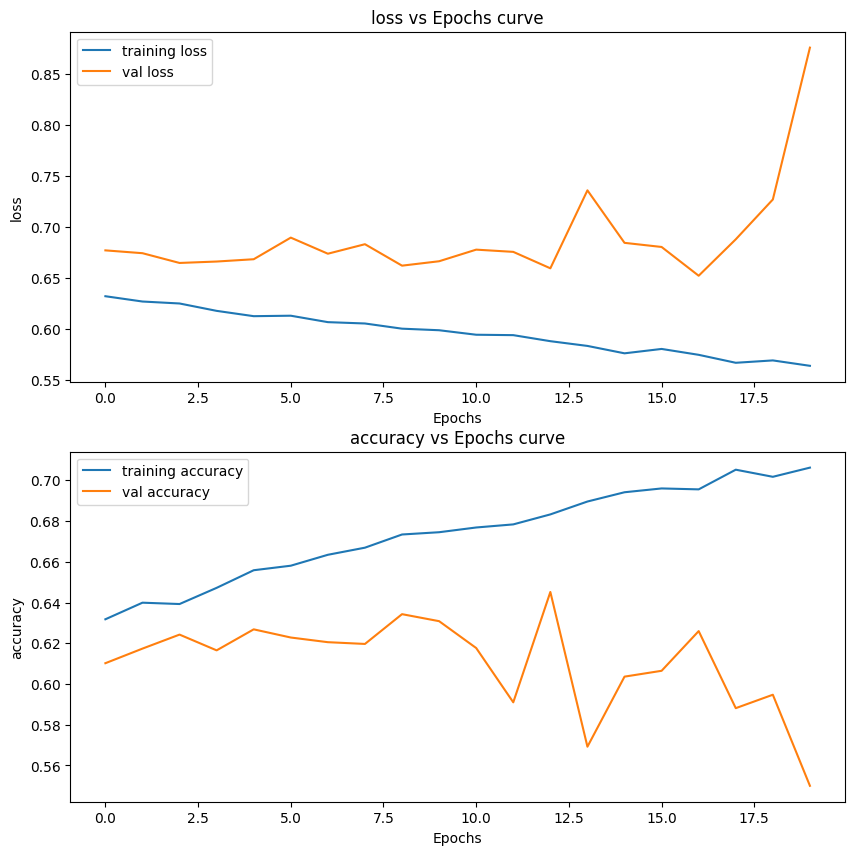

In [167]:
plot_loss_curves(model_5_c_new_2_history)

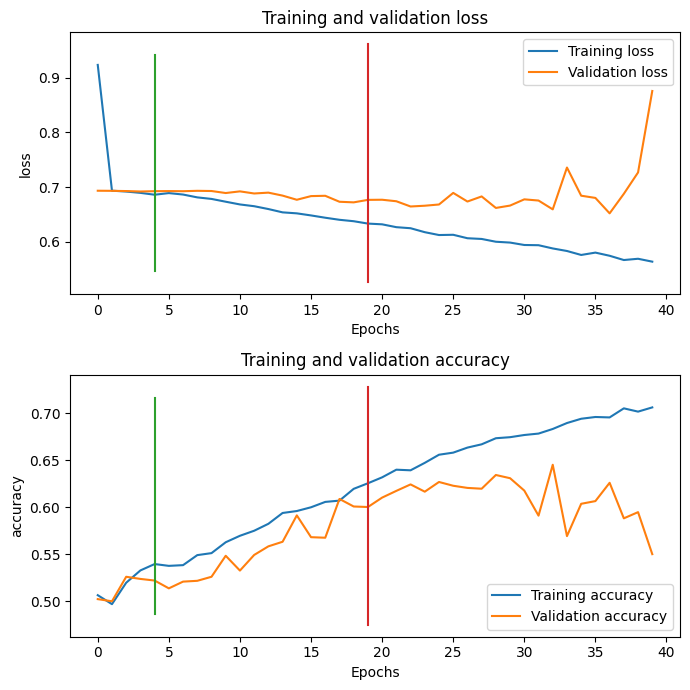

In [171]:
# Compare overall historys
compare_history_overall(history_lst = [model_5_c_history, model_5_c_new_history, model_5_c_new_2_history],
                        initial_epoch_lst = [5, 20])

In [187]:
### MAKING A FUNCTION THAT WILL FIT A MODEL TILL SPECIFIC EPOCH POINTS,
### THEN CONTINUE FROM THAT EPOCH WITH THE BEST WEIGHTS MODEL

def get_range_epoch_results(model, epoch_lst=[5, 20],
                            initial_spoch = 0,
                            callbacks=None, loss_fn='binary_crossentropy',
                            train_data = train_data, test_data = test_data):
  history_lst = []
  eval_res = []

  epoch_lst = [initial_spoch] + epoch_lst
  for index, epoch in enumerate(epoch_lst[1:]):
    if index == 0:
      model.compile(loss = loss_fn,
                    optimizer = Adam(),
                    metrics = ['accuracy'])

    # Make the callback list
    if callbacks:
      callbacks += [create_model_checkpoint(save_dir=f'model_exp/model_rng_{index}')]
    else:
      callbacks = [create_model_checkpoint(save_dir=f'model_exp/model_rng_{index}')]

    # Set the initial_epoch and train the data from it
    initial_epoch = epoch_lst[index]
    print(f'Fitting and training the model: \n  Initial epochs: {initial_epoch}\n  Total epochs: {epoch}\n')
    model_history = model.fit(train_data,
                              steps_per_epoch = len(train_data),
                              epochs = epoch,
                              initial_epoch = initial_epoch,
                              validation_data = test_data,
                              validation_steps = len(test_data),
                              verbose = 0,
                              callbacks = callbacks)

    print(f'Trained the model till {epoch} epochs!!!\n')

    # Load in the best model
    print(f'Loading the best weights model {index + 1}')
    model = tf.keras.models.load_model(f'model_exp/model_rng_{index}')

    # Evaluating the model
    print('Getting the evaluation results')
    eval_res.append(model.evaluate(test_data))

    history_lst.append(model_history)

    print()
    print('-'*50)
    print()

  return history_lst, eval_res

### Model 7: from github

In [181]:
# Create the model
model_7 = Sequential([
    layers.Conv2D(32, (2,2), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPool2D(2,2),
    layers.Conv2D(64, (2,2), activation='relu'),
    layers.MaxPool2D(2,2),
    layers.Conv2D(128, (2,2), activation='relu'),
    layers.MaxPool2D(2,2),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
], name = 'model_7')

# Fit the model into the function
EPOCH_LST = [5, 15, 30, 45, 50]
history_lst_7, eval_lst_7 = get_range_epoch_results(model_7, epoch_lst=EPOCH_LST,
                                                    callbacks=None, loss_fn='binary_crossentropy',
                                                    train_data = train_data, test_data = test_data)

Fitting and training the model: 
  Initial epochs: 0
  Total epochs: 5

Trained the model till 5 epochs!!!

Loading the best weights model 1
Getting the evaluation results
110/110 [==============================] - 4s 36ms/step - loss: 0.6403 - accuracy: 0.6512

--------------------------------------------------

Fitting and training the model: 
  Initial epochs: 5
  Total epochs: 15

Trained the model till 15 epochs!!!

Loading the best weights model 2
Getting the evaluation results
110/110 [==============================] - 4s 39ms/step - loss: 0.7002 - accuracy: 0.5368

--------------------------------------------------

Fitting and training the model: 
  Initial epochs: 15
  Total epochs: 30

Trained the model till 30 epochs!!!

Loading the best weights model 3
Getting the evaluation results
110/110 [==============================] - 4s 36ms/step - loss: 0.6623 - accuracy: 0.6423

--------------------------------------------------

Fitting and training the model: 
  Initial epochs:

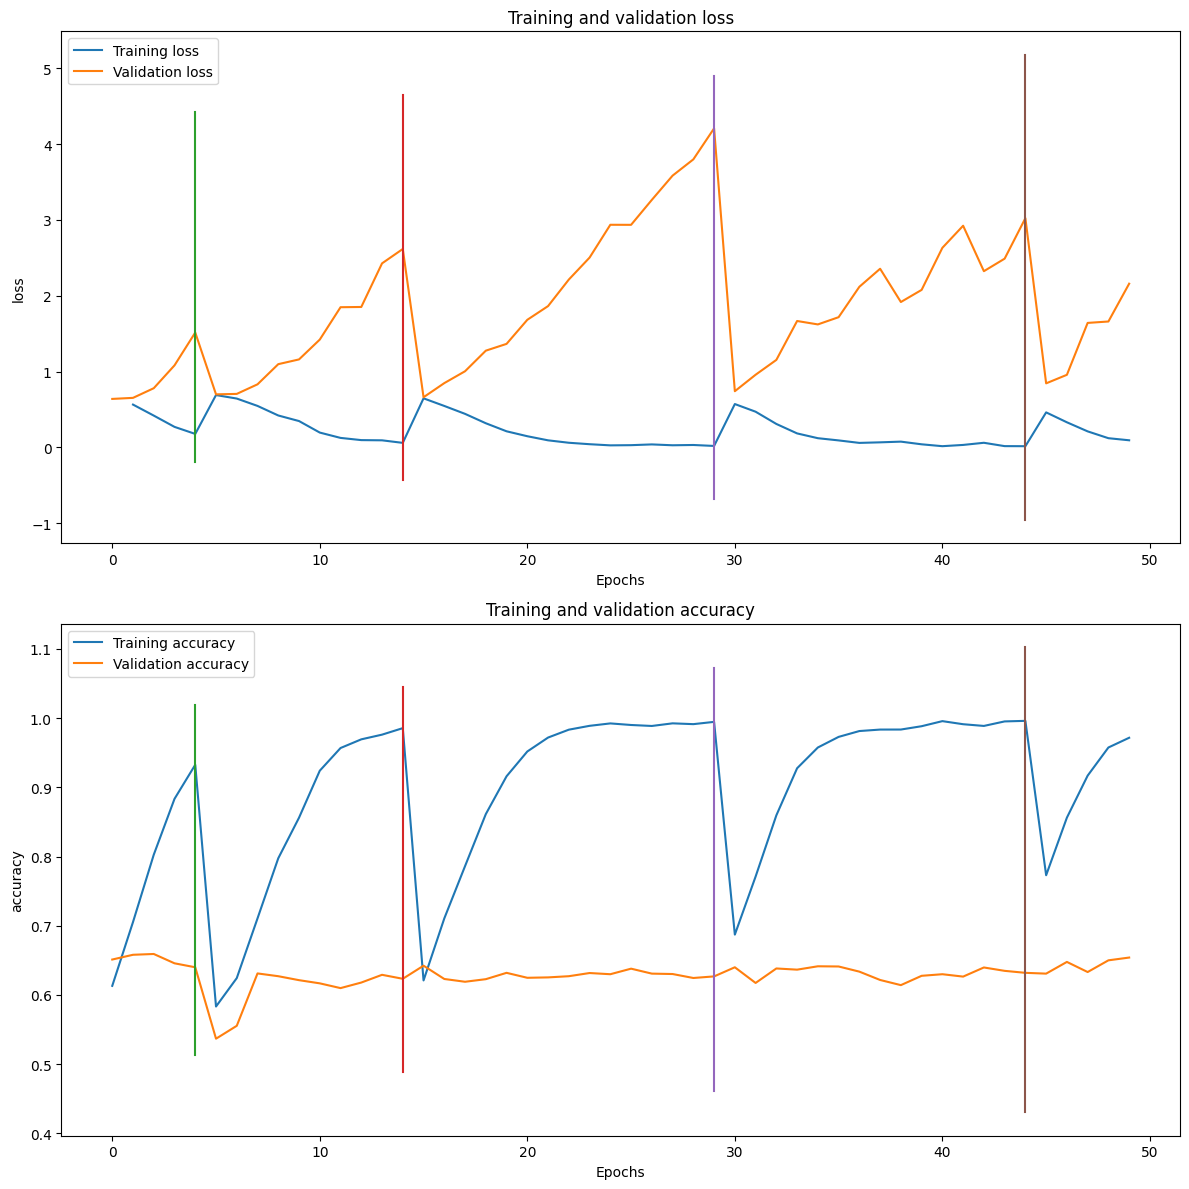

In [186]:
# Compare overall historys
compare_history_overall(history_lst = history_lst_7,
                        initial_epoch_lst = EPOCH_LST[:-1])

### Other method of prefetch and data augmenting the data

In [ ]:
import tensorflow_datasets as tfds
import tensorflow as tf
import matplotlib.pyplot as plt

batch_size = 16
IMG_SIZE = 224
AUTOTUNE = tf.data.AUTOTUNE

# Layer for resizing and rescaling
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMG_SIZE, IMG_SIZE),
    layers.Rescaling(1./255)
])

# Layer for data augmentation
data_augmentation = Sequential([
    layers.RandomHeight(0.2),
    layers.RandomWidth(0.2),
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.3),
])

In [ ]:
# Making a function to prepare augmented prefetched dataset
def prepare(ds, shuffle=False, augment=False):
  # Resize and rescale all datasets.
  ds = ds.map(lambda x, y: (resize_and_rescale(x), y),
              num_parallel_calls=AUTOTUNE)

  if shuffle:
    ds = ds.shuffle(1000)

  # Batch all datasets.
  ds = ds.batch(batch_size)

  # Use data augmentation only on the training set.
  if augment:
    ds = ds.map(lambda x, y: (data_augmentation(x, training=True), y),
                num_parallel_calls=AUTOTUNE)

  # Use buffered prefetching on all datasets.
  return ds.prefetch(buffer_size=AUTOTUNE)

In [ ]:
train_df = prepare(train, shuffle=True, augment=True)

TypeError: ignored

### Model 6: Making same model as model_4, but using functional API, and using a data_augmentation layer. Fitting for first 10, then again for 10 epochs

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

# Set the random seed
tf.random.set_seed(42)

# Making the data augmentation layer
data_augmentation = Sequential([
    layers.RandomHeight(0.2),
    layers.RandomWidth(0.2),
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.3),
])


# Input layer
input_layer = layers.Input(shape=(224, 224, 3))

# Convolutional layers
conv1 = layers.Conv2D(filters=10, kernel_size=(3,3), strides=1, kernel_initializer='he_uniform', activation='relu')(input_layer)
conv2 = layers.Conv2D(filters=10, kernel_size=(3,3), strides=1, kernel_initializer='he_uniform', activation='relu')(conv1)
maxpool1 = layers.MaxPool2D(pool_size=(2,2), strides=2)(conv2)

conv3 = layers.Conv2D(filters=10, kernel_size=(3,3), strides=1, kernel_initializer='he_uniform', activation='relu')(maxpool1)
conv4 = layers.Conv2D(filters=10, kernel_size=(3,3), strides=1, kernel_initializer='he_uniform', activation='relu')(conv3)
maxpool2 = layers.MaxPool2D(pool_size=(2,2), strides=2)(conv4)

# Flatten layer
flatten = layers.Flatten()(maxpool2)

# Dense (fully connected) layer
d_layer = layers.Dense(64, activation='relu')(flatten)
output_layer = layers.Dense(1, activation='sigmoid')(d_layer)

# Creating the model
model_6 = keras.Model(inputs=input_layer, outputs=output_layer, name='model_6')

# Compile the model
model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer = Adam(),
                metrics = ['accuracy'])

In [ ]:
#